In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def plot_loss(path, ax, title):
    df = pd.read_csv(path)
    df.groupby('Epoch').Loss.plot(kind='line', legend=True, title=title, ax=ax, figsize=(15,8))
    ax.legend(loc='upper right')
    plt.xlabel('Step') 
    plt.ylabel('Loss')

Learning Curve

---

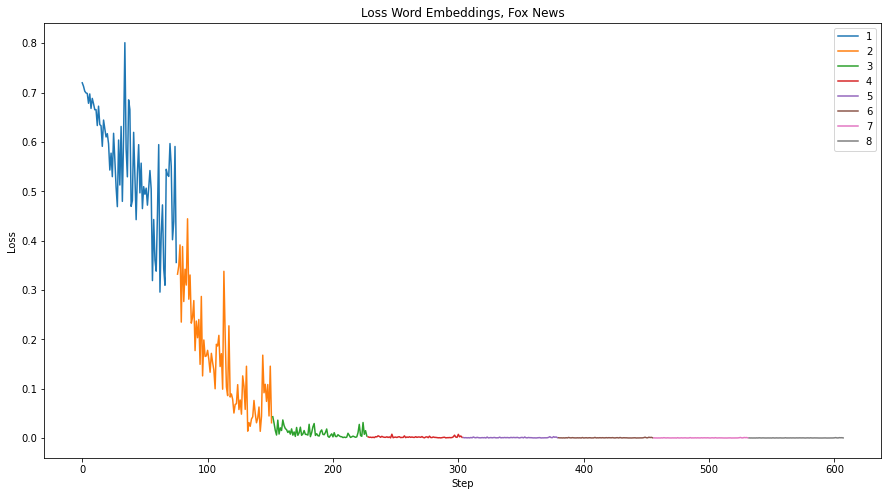

In [38]:
fig, axs = plt.subplots(1,1)
path = './training_logs_word_embedding_fox_news.csv'
plot_loss(path, axs, title='Loss Word Embeddings, Fox News')

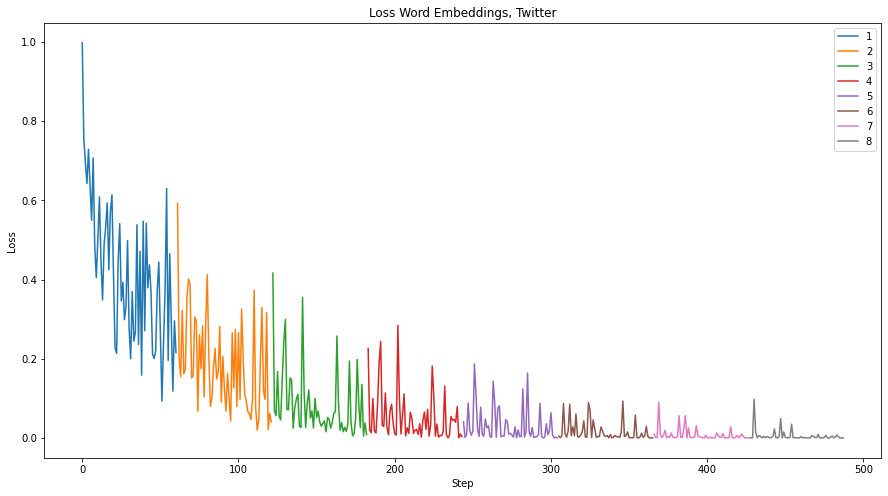

In [40]:
fig, axs = plt.subplots(1,1)
path = './training_logs_word_embedding_twitter.csv'
plot_loss(path, axs, title='Loss Word Embeddings, Twitter')

In [42]:
pathes = []
pathes.append('./matrix_report_twitter.csv')
pathes.append('./matrix_report_fox_news.csv')

In [43]:
def compare_accuracy(pathes, category, ax):
    data_frames = []
    comparisons = []
    for path in pathes:
        df = pd.read_csv(path, index_col=0)
        data_frames.append(df)
        comparisons.append(df.index[:2].values)
    results = []
    for i, df in enumerate(data_frames):
        comparison = comparisons[i]
        results.append({'accuracy': df.loc['accuracy'][0], 'model': comparison})
    df = pd.DataFrame(results)
    
    df = df[df.model.astype(str).str.contains(category)]
    
    title = 'accuracy ' + category 
    ax = df.sort_values(by='accuracy', ascending=False).plot(kind='bar', legend=True, title=title, x='model', ax=ax, rot=0)
    ax.legend(loc='lower right')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [44]:
def compare_metric(pathes, category, metric, ax):
    data_frames = []
    comparisons = []
    for path in pathes:
        df = pd.read_csv(path, index_col=0)
        data_frames.append(df)
        comparisons.append(df.index[:2].values)
    results = []
    for i, df in enumerate(data_frames):
        comparison = str(comparisons[i])
        for _class in df[:2].index.values: 
            results.append({metric: df[:2][metric][_class], 'class': _class, 'model': comparison})
    
    df = pd.DataFrame(results)
    
    df = df[df.model.astype(str).str.contains(category)]
    
    df.set_index(['model', 'class'], inplace=True)
    
    title= metric + ' ' + category
    ax = df.unstack().plot.bar(rot=0, ax=ax, title=title)
    
    ax.legend(loc='lower right')
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=7)

In [45]:
def plot_result(category):

    fig, axs = plt.subplots(1,3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    metric = 'recall'
    compare_metric(pathes, category, metric, ax=axs[0])

    metric = 'precision'
    compare_metric(pathes, category, metric, ax=axs[1])

    metric = 'f1-score'
    compare_metric(pathes, category, metric, ax=axs[2])